# 15-388 Final Project 

#### Group Members 
Stephen Chen, Sean Reidy, Roger Liu

For our project, we want to discover the trends and underlying patterns of anime and the anime community. This community is particularly interesting because anime is a fairly niche genre, and over time certain patterns of shows, expectations, and tropes developed. Our analysis will be primarily concerned with discovering how certain types of shows are received and viewed by the community. We also want to try to discover shows that are “trope codifiers”, that is, which shows have had a heavy influence on the content that gets produced afterwards.

To do this, we will be performing data analysis on the community of MyAnimeList (abbreviated MAL). MAL is a website where users can track and rate the anime that they have watched, and as such, it aggregates a lot of information about the shows themselves and how they are received. This provides many parameters for us to query on, such as the season the show aired, the studio that produced the show, and so on. We will begin by focusing on what factors influecne a shows rating. The site also contains a section where users can suggest related shows. We can use this section to try to find shows which may have spawned certain genres or aspects. 

Some problem we may have in the data is a recency bias, as the popularity of anime has sharply increased in recent years. To combat this we will look at summary statistics, and normalize the data so this effect is mitigated. 



## Web Scraping 

The scraper we wrote currently pulls information from all shows from 1998 to 2015. We do this by iterating through each broadcasting season and pulling the relevant information from the back. This info is extracted by processing the html in beautiful soup. At the moment, the scraper only grabs top level categorical information, such the studios who produced the show, and various quantitative metrics, such as the show’s rating, the number of people who watched the show, and the show’s duration. We can expend this in the future by including the cast who worked on a show, as well as link shows in the same series together.

The scraper is not included in this notebook, but the code for both it and other aspects of this notebook can be found here.
(INSERT LINK TO GIT HUB PAGE LATTER)

## Data Frame 


After scraping is completed, the data is represented by a collection of JSON files, each representing an entry from MAL.  From here we programmatically read in each JSON file and parse them into a pandas dataframe. Since we are interested in the genre tags associated with each anime, we create a series of dummy variables for each genre tag represented in the data set. We also have the option of saving the dataframe as a CSV to be used in other applications like R or Excel. 

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import pandas as pd
import numpy as np
from IPython.display import *

import AssembleData

In [2]:
# Build Dataframe 
MAL_df, all_genre  = AssembleData.read_files_all()

In [3]:
print len(MAL_df)

5628


In [4]:
MAL_df.head()

,action,adventure,aired_end,aired_start,broadcast,cars,category,comedy,dementia,demons,...,super power,supernatural,synopsis,thriller,title,type,url,vampire,yaoi,yuri
0,0,0,2008-04-04T00:00:00,2007-10-18T00:00:00,Unknown,0,anime,0,0,0,...,0,1,In an isolated region of Kyushu lies the town ...,0,Shinreigari: Ghost Hound,TV,https://myanimelist.net/anime/2596/Shinreigari...,0,0,0
0,0,0,2008-06-25T00:00:00,2008-06-25T00:00:00,None,0,anime,1,0,0,...,0,0,Special episode based on manga Navigation 39 e...,0,Aria The Origination: Sono Choppiri Himitsu no...,Special,https://myanimelist.net/anime/4772/Aria_The_Or...,0,0,0
0,1,0,2008-09-16T00:00:00,2008-07-01T00:00:00,Unknown,0,anime,0,0,0,...,0,0,044 becomes the strongest female soldier excel...,0,Ultraviolet: Code 044,TV,https://myanimelist.net/anime/4264/Ultraviolet...,0,0,0
0,1,0,2008-09-29T00:00:00,2008-04-07T00:00:00,Unknown,0,anime,1,0,0,...,0,1,"Silent, apathetic, yet mischievous, 14-year-ol...",0,Nabari no Ou,TV,https://myanimelist.net/anime/3655/Nabari_no_Ou,0,0,0
0,0,0,2008-12-19T00:00:00,2008-12-19T00:00:00,None,0,anime,1,0,0,...,1,0,A special Christmas episode.,0,Sore Ike! Anpanman: Franken-Robo-kun's Surpris...,Special,https://myanimelist.net/anime/17004/Sore_Ike_A...,0,0,0


In [5]:
# Genra tag extractor test 
test = MAL_df[MAL_df['id'] == 4264]
test['action']

0    1
Name: action, dtype: int64

In [75]:
MAL_df.describe()

,action,adventure,cars,comedy,dementia,demons,drama,duration,ecchi,episodes,...,shounen ai,slice of life,space,sports,super power,supernatural,thriller,vampire,yaoi,yuri
count,5628.000000,5628.000000,5628.000000,5628.000000,5628.000000,5628.000000,5628.000000,5628.000000,5628.000000,5628.000000,...,5628.000000,5628.000000,5628.000000,5628.000000,5628.000000,5628.00000,5628.000000,5628.000000,5628.000000,5628.000000
mean,0.314144,0.201848,0.007463,0.502665,0.004797,0.025586,0.189055,27.289380,0.087242,17.719616,...,0.006752,0.131841,0.029495,0.048152,0.067520,0.13344,0.013504,0.017946,0.004264,0.001244
std,0.464215,0.401415,0.086072,0.500037,0.069103,0.157912,0.391587,24.086078,0.282215,58.476666,...,0.081900,0.338348,0.169205,0.214107,0.250942,0.34008,0.115429,0.132767,0.065169,0.035248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,6.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,25.000000,0.000000,15.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,162.000000,1.000000,1818.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


### Total Count for Each Genre 

In [63]:
all_genre_counts = []
for genre in all_genre:
    all_genre_counts.append(len(MAL_df[(MAL_df[genre] == 1)]))

# Display 
genre_df = pd.DataFrame(
    {'Genre' : all_genre,
     'Count' : all_genre_counts
    
    })
genre_df.sort_values('Count', ascending = False)

,Count,Genre
4,2829,comedy
10,1768,action
11,1206,fantasy
5,1184,shounen
18,1136,adventure
2,1088,sci-fi
12,1064,drama
19,976,romance
8,890,school
3,751,supernatural


Comedy is clearly the most popular genre among our dataset, followed by Action and Fantasy.  What is clear from this is a very diverse data set with 43 different genres. 

## Genre Subsets 

In [64]:
# lists of dataframes by Genra 
genre_subsets = [ MAL_df[MAL_df[genre] == 1] for genre in all_genre]

# TODO: IMPROVE THIS CODE 

duration_mean = []
episodes_mean = []
favorites_mean = []
members_mean = []
popularity_mean = []
rank_mean = []
score_mean = []
score_users_mean = []
for df in genre_subsets:
    duration_mean.append(df["duration"].mean())
    episodes_mean.append(df["episodes"].mean())
    favorites_mean.append(df["favorites"].mean())
    members_mean.append(df["members"].mean())
    popularity_mean.append(df["popularity"].mean())
    rank_mean.append(df["rank"].mean())
    score_mean.append(df["score"].mean())
    score_users_mean.append(df["score_users"].mean())
    
#genre_df["duration_mean"] = duration_mean
#genre_df["episodes_mean"] = episodes_mean
#genre_df["favorites_mean"] = favorites_mean
#genre_df["members_mean"] = members_mean
genre_df["popularity_mean"] = popularity_mean
genre_df["rank_mean"] = rank_mean
genre_df["score_mean"] = score_mean
#genre_df["score_users_mean"] = score_users_mean

In [65]:
genre_df.head()

,Count,Genre,popularity_mean,rank_mean,score_mean
0,362,mystery,2301.339779,2202.096685,7.455193
1,158,psychological,1438.379747,1890.184713,7.534873
2,1088,sci-fi,3192.631434,3264.154554,7.088199
3,751,supernatural,2031.584554,2502.302826,7.323302
4,2829,comedy,3448.318841,3532.246181,7.034196


In [67]:
genre_membership_df = pd.DataFrame({
        'Genre' : all_genre,
        "mean_members": members_mean
    })
genre_membership_df.head()

,Genre,mean_members
0,mystery,76333.574586
1,psychological,108807.303797
2,sci-fi,42466.105699
3,supernatural,88034.639148
4,comedy,49545.696359


# EDA

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

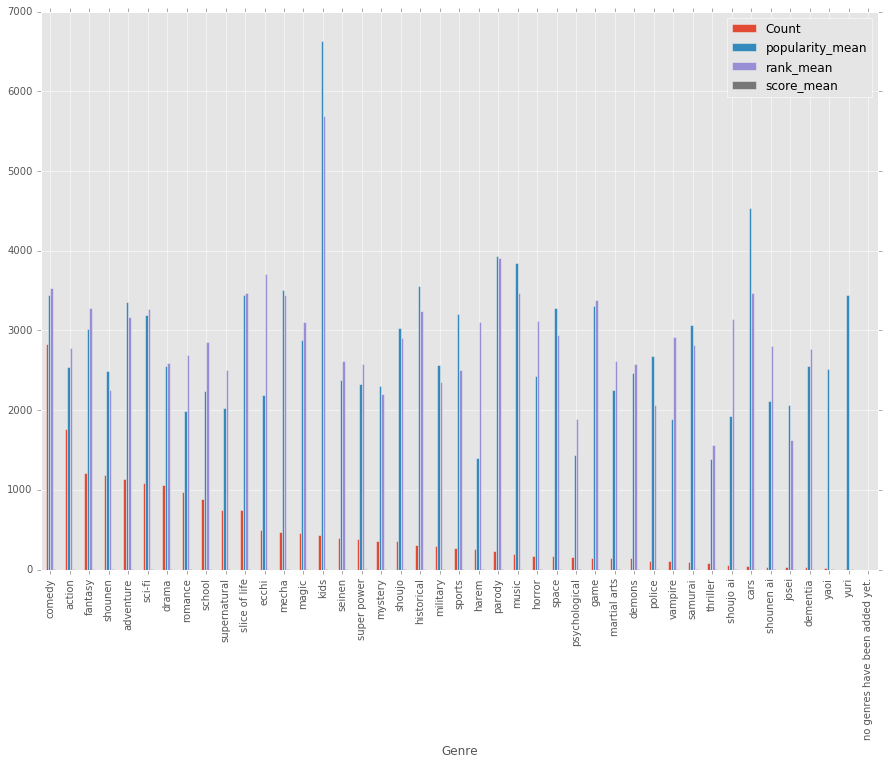

In [55]:
genre_plot = genre_df.plot(kind = 'bar', x = 'Genre')

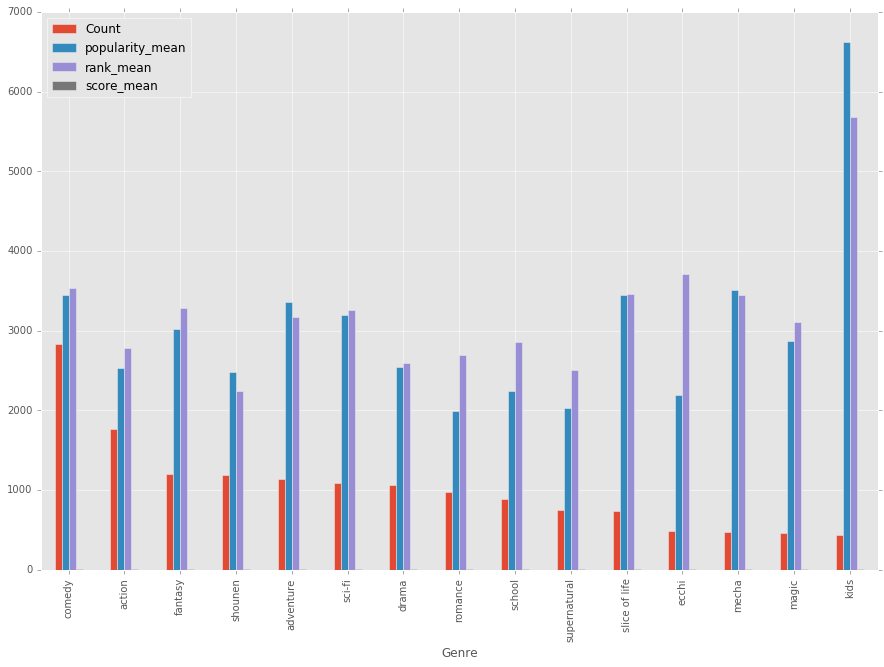

In [69]:
## top 15 genre 
genre_df.sort_values('Count', ascending = False, inplace = True)
genre_df_top = genre_df.head(15)
genre_plot_2 = genre_df_top.plot(kind = 'bar', x = 'Genre')

For most genres the mean popularity and the mean rank among anime are similar, while others (like Romance ) have clear differences in the two values. This could be a metric to  indicate the level of engagement among the members of a show’s community .

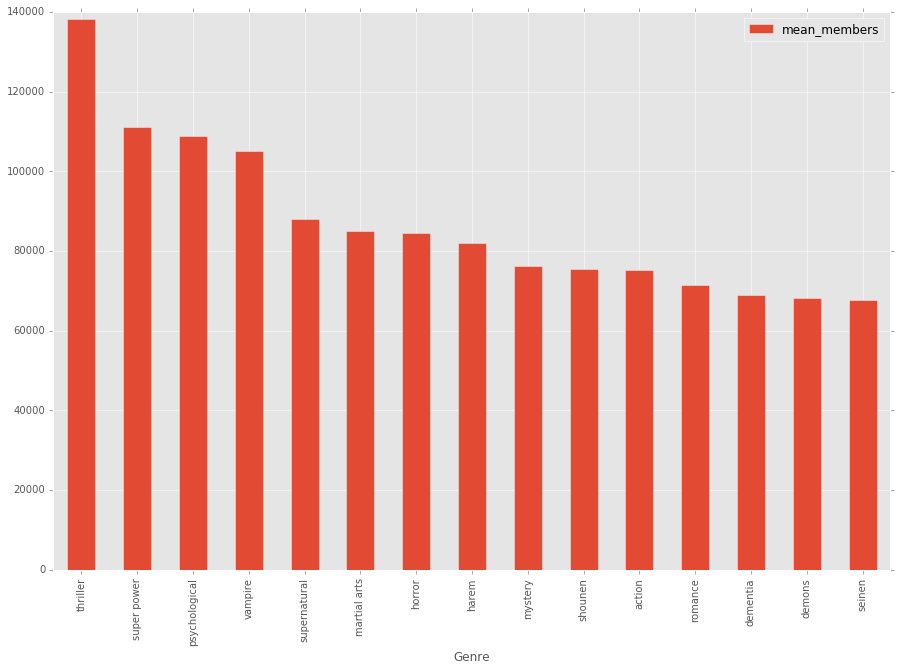

In [70]:
genre_membership_df.sort_values('mean_members', ascending = False, inplace = True)
genre_membership_df_top = genre_membership_df.head(15)
genre_plot_3 = genre_membership_df_top.plot(kind = 'bar', x = 'Genre')

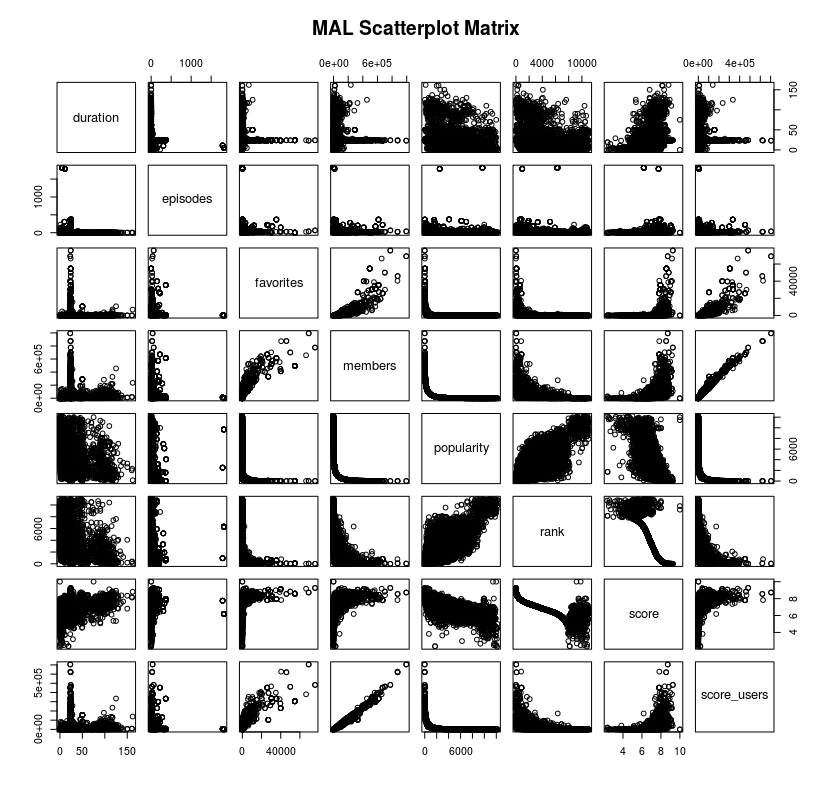

In [57]:
Image('Rcode/scatterplotMatrix.png')

The Scatterplot Matrix demonstrates that trends exists among the different continuous variables in the data set. Some interesting relations include the positive linear relation between a shows score and its durations where the longer the show the higher the average score. 

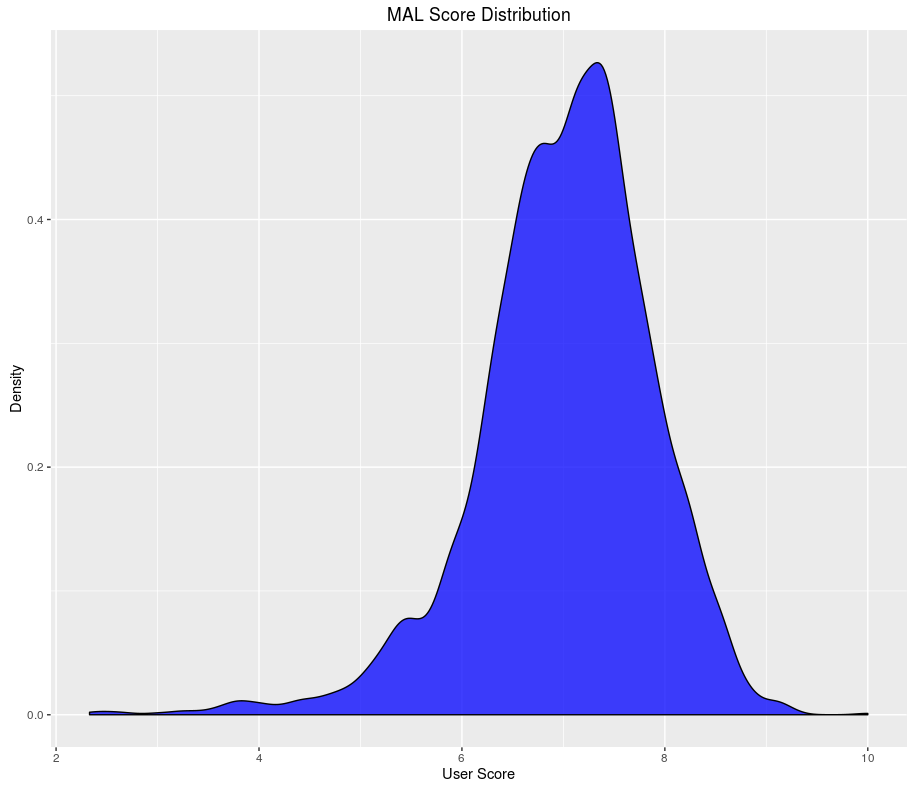

In [73]:
Image("Rcode/scoreDen.png")

## Next Steps 

From here, our first step is to build multivariate linear regression models focusing on an anime’s score. With this model we should hopefully be able to extrapolate what features in the dataset are the most important, where more advanced methods could be used.  One proposed Idea is to build a linear classifier to identify different genres and tropes.  We can also bring in more information that was scripted, like the lists of producers and licensors of each show. 